# Сделал: Хаялиев Раниль

# Конспект по парсингу

> [Здесь лежит конспект занятий по парсингу от PythonToday](https://www.youtube.com/watch?v=AFqYxaOyqy0&list=PLqGS6O1-DZLprgEaEeKn9BWKZBvzVi_la)
- [А вот GitHub со всем кодом](https://github.com/pythontoday/scrap_tutorial)

> [Также здесь будет параллельно конспект от ZProger](https://youtube.com/playlist?list=PL6plRXMq5RADYaw4Xo111smBcEPNMhdHf&si=x_CloCheAwFvQ-cP)

<b>Дальше если нумерация в [] скобках у видео, значит это от ZProger, иначе - от PythonToday.</b>

## Занятие 1: Методы в Beatifulsoup : 

- [Видео 1](https://youtu.be/7hn1_t2ZtJQ?si=rWoXoWqTGzKbstN0)

## `BeautifulSoup` 
- это библиотека для парсинга HTML и XML документов. Она позволяет легко извлекать данные из веб-страниц, используя различные методы для навигации по дереву элементов.

--- 
### Основные параметры при создании объекта BeautifulSoup:
- `markup`: HTML-код, который нужно распарсить.
- `html`: HTML-код, который нужно распарсить.
- `features`: указывает, какой парсер использовать (например, 'html.parser', 'lxml', 'html5lib').

---
| Основные атрибуты BeautifulSoup         | Основные методы BeautifulSoup                   |
|-----------------------------------------|------------------------------------------------|
| `soup`: объект BeautifulSoup, который содержит распарсенный HTML-код. | `get()`: получает значение атрибута элемента. (например, `get('href')`) <br> Вместо `get()` можно использовать `attrs['name']`. |
| `title`: возвращает заголовок документа.| `find()`: находит первый элемент по критерию.   |
| `text`: возвращает текстовое содержимое документа. | `find_all()`: находит все элементы по критерию. |
| `string`: возвращает строковое представление объекта. | `find_next()`: находит следующий элемент по критерию. |
| `next_element`: возвращает следующий элемент в дереве (включая переносы строк). | `find_next_sibling()`: находит следующий элемент-сосед. |
| `previous_element`: возвращает предыдущий элемент в дереве. | `find_previous()`: находит предыдущий элемент по критерию. |
|                                         | `find_previous_sibling()`: находит предыдущий элемент-сосед. |
|                                         | `find_parent()`: находит ближайший родительский элемент. |
|                                         | `find_parents()`: находит всех родительских элементов. |
---
### Основные параметры методов:
- `name`: имя тега, который нужно найти (например, 'div', 'span').
- `attrs`: словарь атрибутов, которые должны соответствовать элементу (например, {'class': 'my-class'}). Если есть ключевое слово `class`, то нужно использовать `class_` (с нижним подчеркиванием).
- `text`: текстовое содержимое элемента, которое должно соответствовать заданному значению (например, 'Hello World').
> Здесь можно использовать регулярные выражения, если нужно найти текст, который соответствует определенному шаблону.

### Задание 1: 
Протестировать все методы и атрибуты BeautifulSoup на примере HTML-кода. 


In [4]:
PATH = 'data/lesson1/index2.html'

with open(PATH, 'r') as f:
    src = f.read() # src - source хранит в себе какие-то данные 

print(type(src))
print(src)

<class 'str'>
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Главная страница блога</title>
    <link rel="stylesheet" href="style.css">
</head>
<body>
<div class="container">
    <h1>Страница пользователя Mr. Anderson</h1>
    <h1>Ещё один h1 заголовок</h1>
    <div class="user__data">
        <div class="user__avatar">
            <img src="user_avatar.jpg" alt="">
        </div>
        <div class="user__info">
<!--            <a href="" class="user__name">-->
<!--                <span>Mrs Purple</span>-->
<!--            </a>-->
            <div class="user__name" id="aaa">
                <span>Mr Anderson</span>
            </div>
            <div class="user__birth__date">
                <span>Дата рождения:</span>
                <span>01.01.1970</span>
            </div>
            <div class="user__city">
                <span class="city__label">Город:</span>
                <span>Los Angeles</span>
            </div>
<!--            <a href=

In [17]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(markup= src,
                     features= 'lxml')

print(type(soup))
all_links = soup.find_all('a')

print("Все ссылки:")
for link in all_links:
    link: BeautifulSoup

    print(link.get("href"))

print("Второй способ: ")
for link in all_links:
    link: BeautifulSoup
    print(link["href"])

<class 'bs4.BeautifulSoup'>
Все ссылки:
http://instagram.com/username
http://twitter.com/username
http://youtube.com/username
/supermarket/
/clothes/
Второй способ: 
http://instagram.com/username
http://twitter.com/username
http://youtube.com/username
/supermarket/
/clothes/


In [ ]:
# Выведем данные в user__name | user__birth__date | user__city

user__name = soup.find(name= "div", 
                       attrs= {"class": "user__name"})

# Способ 1:
user__birth_date = user__name.next_sibling.next_sibling

# Способ 2:
user__city = user__birth_date.find_next_sibling()


# Альтернативное решение
user__name.find_next_siblings()[:2]

# Еще один альтернативный вариант
user__city = soup.find(name= "div",
                       attrs= {"class": "user__city"})
# Способ 1:
user__birth_date = user__city.previous_sibling.previous_sibling

# Способ 2:
user__name = user__birth_date.find_previous_sibling()

<div class="user__name" id="aaa">
<span>Mr Anderson</span>
</div>

In [43]:
user__name.find_parent()

<div class="user__info">
<!--            <a href="" class="user__name">-->
<!--                <span>Mrs Purple</span>-->
<!--            </a>-->
<div class="user__name" id="aaa">
<span>Mr Anderson</span>
</div>
<div class="user__birth__date">
<span>Дата рождения:</span>
<span>01.01.1970</span>
</div>
<div class="user__city">
<span class="city__label">Город:</span>
<span>Los Angeles</span>
</div>
<!--            <a href="">ЕЩЁ КАКАЯ-ТО ССЫЛКА</a>-->
<div class="social__networks">
<p>Ссылки на соц.сети:</p>
<ul>
<li>
<a href="http://instagram.com/username">Instagram</a>
</li>
<li>
<a href="http://twitter.com/username">Twitter</a>
</li>
<li>
<a href="http://youtube.com/username">Youtube</a>
</li>
</ul>
</div>
</div>

In [51]:
print(user__name)
print(user__name.text)
print(soup.title)
print(soup.name)

<div class="user__name" id="aaa">
<span>Mr Anderson</span>
</div>

Mr Anderson

<title>Главная страница блога</title>
[document]


Задание выполнено

## Занятие 2: Парсинг сайтов с помощью BeatifulSoup
- [Видео 2](https://youtu.be/ks64MvZJe0w?si=XUQGHjT46JedOZXk)

## `requests` 
- это библиотека для отправки HTTP-запросов и получения ответов от веб-серверов. Она позволяет легко взаимодействовать с веб-страницами, получать данные и отправлять формы.

### Основные методы `requests`:
- `get(url, params=None, headers=None)`: отправляет GET-запрос на указанный URL. Параметры `params` и `headers` могут использоваться для передачи дополнительных данных и заголовков.
- `post(url, data=None, json=None, headers=None)`: отправляет POST-запрос на указанный URL. Параметры `data` и `json` могут использоваться для передачи данных в теле запроса.
- `put(url, data=None, headers=None)`: отправляет PUT-запрос на указанный URL. Параметры `data` и `headers` могут использоваться для передачи данных и заголовков.
- `delete(url, headers=None)`: отправляет DELETE-запрос на указанный URL. Параметр `headers` может использоваться для передачи заголовков.


> - В headers можно передавать различные заголовки, такие как `User-Agent`, `Accept`, `Content-Type` и другие, чтобы указать серверу, как обрабатывать запрос. 
> - `Accept` указывает, какие типы данных клиент может обработать, а `Content-Type` указывает тип данных, отправляемых в теле запроса.
> - `Accept` = */* означает, что клиент может обработать любые типы данных.
> - `User-Agent` - это строка, которая идентифицирует клиентское приложение (например, браузер) и его версию. Она может использоваться для определения типа устройства и операционной системы клиента. И библиотека `fake_useragent` позволяет сгенерировать случайный User-Agent, чтобы избежать блокировок со стороны сервера.

### Основные параметры и методы `requests.get(url)`

**Параметры:**
- `headers` — словарь с заголовками запроса (например, можно указать `User-Agent`).
- `proxies` — словарь с прокси-серверами для использования при отправке запроса.
- `timeout` — время ожидания ответа от сервера в секундах (по умолчанию 5 секунд).
- `params` — словарь с параметрами запроса, которые будут добавлены к URL (например, для фильтрации или сортировки данных).
- `auth` — кортеж с именем пользователя и паролем для аутентификации (например, для доступа к защищенным ресурсам).

**Основные методы и атрибуты ответа:**
- `.text` — возвращает содержимое ответа в виде строки (HTML-код страницы).
- `.content` — возвращает содержимое ответа в виде байтов. (Для скачивания изображений или файлов)
- `.status_code` — возвращает HTTP-код ответа (например, 200, 404, 500 и т.д.).

## Работа с `JSON` в Python:

- это формат обмена данными, который используется для передачи структурированных данных между клиентом и сервером. Он основан на JavaScript, но поддерживается многими языками программирования, включая Python.
### Основные методы работы с JSON в Python:


- `json.loads(json_string)`: преобразует строку JSON в объект Python (например, словарь или список).
- `json.dumps(obj)`: преобразует объект Python в строку JSON.
> -s на конце означает работу со строками
- `json.load(file)`: читает JSON-данные из файла и преобразует их в объект Python.
- `json.dump(obj, file)`: записывает объект Python в файл в формате JSON.
> -без -s на конце означает работу с файлами

### Основные атриуты JSON:
- `json_string`: строка в формате JSON, которую нужно преобразовать в объект Python.
- `obj`: объект Python, который нужно преобразовать в строку JSON.
- `file`: файл, в который нужно записать объект Python в формате JSON или из которого нужно прочитать JSON-данные.

> Также для парсинга понадобится атрибуты JSON:
- `indent`: количество пробелов для отступов в формате JSON (например, `indent=4`).
- `ensure_ascii`: если `True`, то все символы будут преобразованы в ASCII (по умолчанию `False`).

### Задание 2:

Провернуть все тоже самое, что и в видео, но только для 3-х ссылок и сохранять резьтат только в JSON-файл. (с CSV можно попробовать позже разобраться "там ничего сложного нет")

ВОТ сайт: https://fitaudit.ru/categories/fds

In [ ]:
import requests
from bs4 import BeautifulSoup
import json

PATH = "data/hw2/request.html"

url = "https://fitaudit.ru/categories/fds"

header = {"Accept": "*/*",
          "User-Agent" : "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/132.0.0.0 YaBrowser/25.2.0.0 Safari/537.36"}

response = requests.get(url= url, headers= header).text

with open(PATH, 'w') as file:
    file.write(response)

In [79]:
PATH_JSON = 'data/hw2/fruits.json'

with open(PATH, 'r') as file:
    src = file.read()
soup = BeautifulSoup(markup= src,
                     features= 'lxml')

fruits = soup.find('div', id= 'frts').find_next_sibling()
all_fruits_links = fruits.find_all(name= "a")
json_fruits = dict()

for link in all_fruits_links:
    item_name = link.get("title")
    item_link = link.get("href")
    json_fruits[item_name] = item_link
    print(f"{item_name} = {item_link}")

with open(PATH_JSON, 'w') as f:
    json.dump(json_fruits,
              f,
              ensure_ascii= False,
              indent= 4)

Абрикос (свежий) = https://fitaudit.ru/food/114512
Абрикосы (консервированные) = https://fitaudit.ru/food/115520
Айва (свежая) = https://fitaudit.ru/food/114337
Апельсины (свежие) = https://fitaudit.ru/food/114159
Арбуз (свежий) = https://fitaudit.ru/food/114427
Бананы (свежие) = https://fitaudit.ru/food/114679
Гранат (свежий) = https://fitaudit.ru/food/114307
Грейпфрут (свежий) = https://fitaudit.ru/food/114885
Груша (консервированная) = https://fitaudit.ru/food/115671
Груша (свежая) = https://fitaudit.ru/food/114205
Груша Конференция (свежая) = https://fitaudit.ru/food/115791
Дыня (свежая) = https://fitaudit.ru/food/114001
Дыня Канталупа (свежая) = https://fitaudit.ru/food/114092
Инжир (свежий) = https://fitaudit.ru/food/114716
Киви (свежий) = https://fitaudit.ru/food/114993
Лайм (свежий) = https://fitaudit.ru/food/114926
Лимон (свежий, без кожуры) = https://fitaudit.ru/food/114909
Мандарины (свежие) = https://fitaudit.ru/food/114103
Маслины (консервированные) = https://fitaudit.ru/f

In [ ]:
json_fruits = None
with open(PATH_JSON) as f:
    json_fruits = json.load(f)

{'Абрикос (свежий)': 'https://fitaudit.ru/food/114512',
 'Абрикосы (консервированные)': 'https://fitaudit.ru/food/115520',
 'Айва (свежая)': 'https://fitaudit.ru/food/114337',
 'Апельсины (свежие)': 'https://fitaudit.ru/food/114159',
 'Арбуз (свежий)': 'https://fitaudit.ru/food/114427',
 'Бананы (свежие)': 'https://fitaudit.ru/food/114679',
 'Гранат (свежий)': 'https://fitaudit.ru/food/114307',
 'Грейпфрут (свежий)': 'https://fitaudit.ru/food/114885',
 'Груша (консервированная)': 'https://fitaudit.ru/food/115671',
 'Груша (свежая)': 'https://fitaudit.ru/food/114205',
 'Груша Конференция (свежая)': 'https://fitaudit.ru/food/115791',
 'Дыня (свежая)': 'https://fitaudit.ru/food/114001',
 'Дыня Канталупа (свежая)': 'https://fitaudit.ru/food/114092',
 'Инжир (свежий)': 'https://fitaudit.ru/food/114716',
 'Киви (свежий)': 'https://fitaudit.ru/food/114993',
 'Лайм (свежий)': 'https://fitaudit.ru/food/114926',
 'Лимон (свежий, без кожуры)': 'https://fitaudit.ru/food/114909',
 'Мандарины (свежи

In [ ]:
counter = 0

header = {"Accept": "*/*",
          "User-Agent" : "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/132.0.0.0 YaBrowser/25.2.0.0 Safari/537.36"}

path_files = []

PATH = "data/hw2/"
for fruit, link in json_fruits.items():
    if counter > 2:
        break
    counter+= 1
    
    response = requests.get(link, headers= header).text
    file_path = PATH + f"{fruit}.html"
    
    with open(file_path, "w") as f:
        f.write(response)

    path_files.append(f)

In [91]:

with open(PATH + "files.txt", "w") as f:
    path_files = [el.name + "\n" for el in path_files]
    f.writelines(path_files)

In [ ]:
path_files = None

with open(PATH + "files.txt", "r") as f:
    path_files= f.readlines()
    path_files= [el[:-1] for el in path_files]

print(path_files)

['data/hw2/Абрикос (свежий).html', 'data/hw2/Абрикосы (консервированные).html', 'data/hw2/Айва (свежая).html']


In [ ]:
data_json = []
for path_file in path_files:
    with open(path_file) as f:
        html_code = f.read()

    soup = BeautifulSoup(markup= html_code,
                  features= 'lxml')
    data = soup.find('div', id= "him_bx").find_all('span', class_ = "him_bx__legend pr__fl")
    
    d_json = dict()
    for el in data: 
        key = el.text.split()[0].capitalize()
        value = float(el.text.split()[2].replace(',', '.'))
        d_json[key] = value
    
    data_json.append(d_json)

print(data_json)

[{'Жиры': 0.39, 'Белки': 1.4, 'Углеводы': 11.12, 'Вода': 86.35, 'Зола': 0.75}, {'Жиры': 0.11, 'Белки': 0.64, 'Углеводы': 21.31, 'Вода': 77.56, 'Зола': 0.38}, {'Жиры': 0.1, 'Белки': 0.4, 'Углеводы': 15.3, 'Вода': 83.8, 'Зола': 0.4}]


In [114]:
with open(PATH + 'data.json', 'w') as file:
    json.dump(data_json, file, indent= 4, ensure_ascii= False)

Задание выполнено за 2 часа (9:00 - 11:00 (перерыв был 20 минут))

## Занятие 3: Авторизация на сайте т работа с КУКИ и СЕССИЕЙ
- [Видео \[3\]](https://youtu.be/IEfQLbxHY_g?si=VV6GYptQpWWA6ZPC)

1) При авторизации первым делом нужно иследовать элемент, который отвечает за авторизацию.(Там где ввод логина и пароля)
2) После этого нужно найти атрибуты, которые отвечают за логин и пароль. 

В видео:
- req_username
- req_password

При авторизации используется post запрос:
> request.post(...)

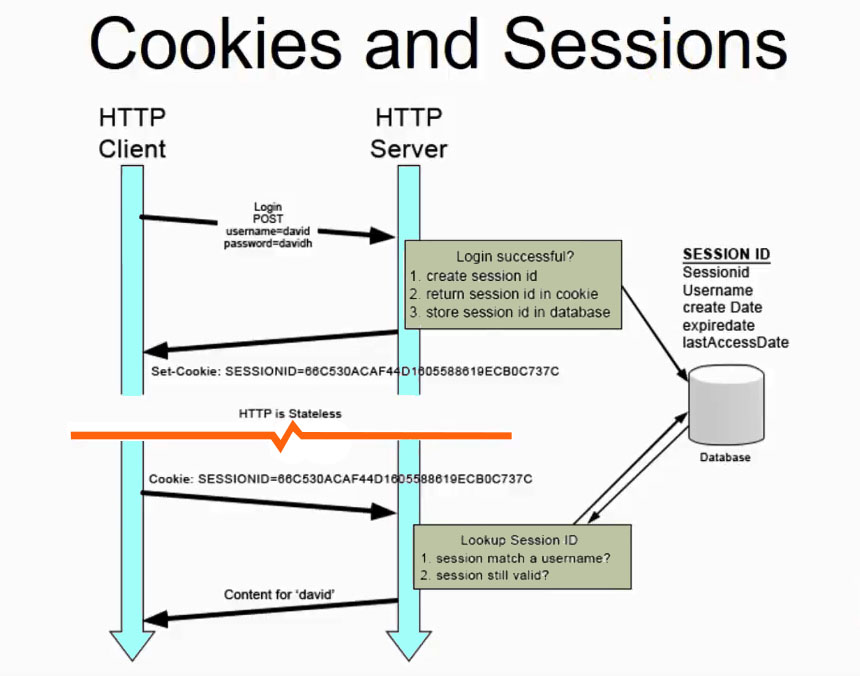

## `requests.Session()`

| Возможности сессии | Описание |
|--------------------|----------|
| Сохраняет куки между запросами | После авторизации не нужно повторно входить при каждом запросе |
| Не требует повторной авторизации | Все запросы выполняются как бы "от одного пользователя" |
| Переиспользует заголовки и параметры | Можно задать заголовки один раз для всей сессии |

> Если не использовать сессии, то после авторизации можно сделать только одно действие. Сессия позволяет выполнять несколько действий подряд (например, получить данные пользователя, отправить форму и т.д.).

### Основные методы

| Метод | Описание |
|-------|----------|
| `session.get(url, params=None, headers=None)` | GET-запрос с сохранёнными куками и сессией |
| `session.post(url, data=None, json=None, headers=None)` | POST-запрос с сохранёнными куками и сессией |

### Основные атрибуты

| Атрибут | Описание |
|---------|----------|
| `session.cookies` | Объект `RequestsCookieJar`, где хранятся куки |

#### Атрибуты и методы `RequestsCookieJar`

| Атрибут/метод | Описание |
|---------------|----------|
| `domain` | Домен, к которому принадлежат куки |
| `name` | Имя куки |
| `path` | Путь, к которому принадлежат куки |
| `value` | Значение куки |
| `get(name)` | Получить значение куки по имени |
| `set(name, value, domain=None, path=None)` | Установить значение куки по имени |


## ДОПОЛНИТЕЛЬНЫЕ ЗАНЯТИЯ

| № занятия | Тема и видео | Краткое описание / особенности |
|-----------|--------------|-------------------------------|
| **3 / 3.2** | [Парсинг динамических сайтов (Видео 3)](https://youtu.be/gy_YlibMW6Q?si=qIxT9oHZSxAqsNI9)<br>[Промежуточное занятие (Видео 3.2)](https://youtu.be/1XhP6icd55M?si=EH2bKkQV9tQg1Wii) | - В network видно, что при скролле появляется GET-запрос для подгрузки новых данных.<br>- В параметрах запроса есть `offset`, `limit`, `PAGE`, `PAGE_SIZE`.<br>- `PAGE_SIZE` — количество элементов на странице.<br>- `offset` — смещение (PAGE_SIZE * (PAGE - 1)).<br>- `limit` — сколько элементов загружать (обычно = PAGE_SIZE).<br>- Иногда offset называют `o`.<br>- Задания нет, всё подробно разобрано в видео. |
| **4** | [Парсинг сайтов: requests, BeautifulSoup, lxml, proxy (Видео 4)](https://youtu.be/arBTqminwU8?si=dvB-Zj-eBTG0I-BL) | - Разбор подгрузки данных по кнопке "Показать ещё".<br>- В ответе сервера приходит словарь с ключом `html` (HTML-код новых данных).<br>- Иногда запросы не проходят с одного IP — нужны прокси.<br>- `proxy-серверы` скрывают реальный IP, помогают обойти блокировки и ограничения.<br>- Пример прокси: `"https" : "your_proxy_ip:port"`.<br>- Прокси передаются через параметр `proxies` в `requests.get()`. |
| **5** | [Images to PDF (Видео 5)](https://youtu.be/ak8Nl1Stba4?si=Oi1UgwWZPCh6o4Oo)<br>[Библиотека img2pdf](https://pypi.org/project/img2pdf/) <br>[Видео 4 (IMAGE.)](https://youtu.be/r61fuLk3LNM?si=lJZw2sFLuZNOy7Qx)| - Конвертация изображений в PDF с помощью библиотеки `img2pdf`.<br> - Также главное, что при скачивании изображения используется не `.text`, а .`content`|


Дальше можно, видимо не смотреть этот курс, т.к. самый сок был в начале 


- [Видео \[5\] ](https://youtu.be/FOkoIA4udcU?si=KFe3HF3IEQmL1hgp)- про PROXY и как их использовать в парсинге. [КУПИТЬ ПРОКСИ,КОТОРЫЕ ИСПОЛЬЗОВАЛИСЬ В ВИДЕО](https://www.youtube.com/redirect?event=comments&redir_token=QUFFLUhqbi1sWHdOZ2ZtWHNzZVdINzh1MXE4M2otQjJJQXxBQ3Jtc0tsbVJ5VnVtLUczVmR0YnlsbW95aVpKX3RXUTZwVjcwTlBjZk42ZGxGbWdnWGl5UWRxSjlxSXN1RktKTzhINWk2bGxGWFQ5MlNxcXZoOXNrZllLVF9PcC0zdUd6MnlWRlMybFFsUTVPRmNSX0JMVmNaMA&q=https%3A%2F%2Fbit.ly%2F3z9AduI)

>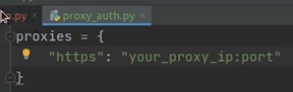 

>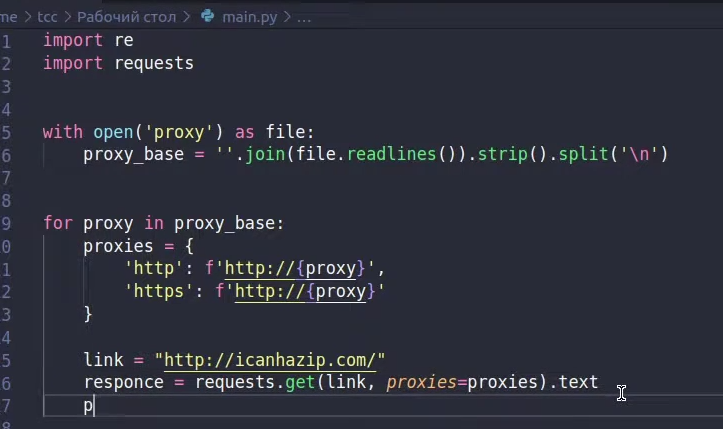


**Можно указывать config, в json файле, т.е.  config.json, и в нём хранить настройки.**